In [1]:
%load_ext tikzmagic
%matplotlib inline

# 회귀분석의 소개

## 단변수 회귀분석의 예

서로 상관관계가 있는 두가지 데이터가 있으면 한가지 데이터의 값으로부터 다른 하나의 데이터 값을 대략적이나마 유추할 수 있다. 예를 들어 팁데이터에서 총 지불금액 total_bill과 팁 금액 tip은 다음과 같이 하나가 증가하면 다른 하나도 증가하는 양의 상관관계가 있다.

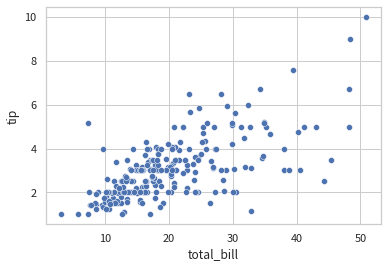

In [2]:
import seaborn as sns

tips = sns.load_dataset("tips")

sns.scatterplot(x="total_bill", y="tip", data=tips)
plt.show()

seaborn 패키지에서 제공하는 `regplot` 함수를 사용하면 total_bill과 tip의 선형 상관관계를 대표하는 직선, 즉 스캐터플롯의 모습과 가장 유사한 직선을 스캐터플롯 위에 표시할 수 있다.

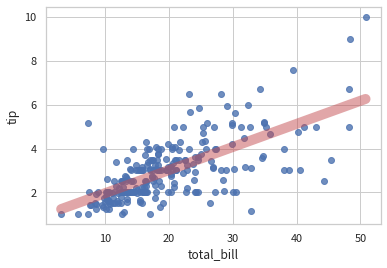

In [3]:
sns.regplot(x="total_bill", y="tip", data=tips, 
            ci=None, line_kws={"color": "r", "lw": 10, "alpha": 0.5})
plt.show()

statsmodels 패키지를 사용하면 이 직선의 방정식을 알아낼 수 있다.

In [4]:
import statsmodels.api as sm

result1 = sm.OLS.from_formula("tip ~ total_bill", tips).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sun, 24 Jul 2022   Prob (F-statistic):           6.69e-34
Time:                        15:46:36   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

위 코드를 작성하는 방법와 결과를 해석하는 방법은 다음 절에서 자세힌 설명한다. 우선은 위 결과로부터 직선의 방정식이 다음과 같다는 것을 알 수 있다.

$$
\text{tip} = 0.1050 \cdot \text{total_bill} + 0.9203
$$

이 방정식은 total_bill을 입력으로 받아 tip을 출력하는 함수의 방정식이므로 total_bill 값으로부터 tip의 대략적인 값을 알아낼 수 있다. 이 함수의 식에서 total_bill 에 곱해지는 0.1050이라는 숫자를 total_bill에 대한 <b>가중치(weight)</b>라고 한다. 수식의 마지막에 있는 0.9203은 <b>상수항(constant)</b>이라고 한다.

위 함수를 파이썬 함수로 정의하면 다음과 같다.

In [5]:
def reg1(total_bill):
    return 0.1050 * total_bill + 0.9203

예를 들어 total_bill의 값이 30달러이면 방정식으로부터 tip 금액은 약 4.07달러가 된다.

In [6]:
reg1(30)

4.0703

실제로 total_bill이 30달러 근처(29달러 이상 31달러 이하)인 경우의 데이터를 모아서 보면 다음과 같다.

In [7]:
tip_totalbill30 = tips[(tips.total_bill >= 29) & (tips.total_bill <= 31)].tip
tip_totalbill30

44     5.60
116    5.07
125    4.20
155    5.14
187    2.00
210    2.00
219    3.09
239    5.92
Name: tip, dtype: float64

이 데이터의 평균은 4.13달러다. 우리가 위 방정식으로부터 계산한 값과 유사한 것을 알 수 있다. 

In [8]:
tip_totalbill30.mean()

4.1274999999999995

이렇게 데이터 간의 상관관계를 이용하여 수치형 데이터의 값을 구하는 것을 <b>회귀분석(regression analysis)</b>이라고 한다. 회귀분석 중에서도 하나의 데이터 값을 사용하여 다른 하나의 데이터 값을 알아내는 것을 <b>단변수 회귀분석(univariate regression analysis)</b>이라고 한다.

## 다변수 회귀분석의 예

위에서는 total_bill이라는 하나의 데이터만을 사용하여 tip을 계산하였지만 tip과 상관관계가 있는 다른 데이터가 있다면 그 값도 동시에 사용할 수 있다. 
예를 들어 size와 tip도 서로 약간의 상관관계를 가지고 있다.

In [9]:
from scipy.stats import pearsonr

pearsonr(tips["size"], tips["tip"])

(0.4892987752303571, 4.3005433272249695e-16)

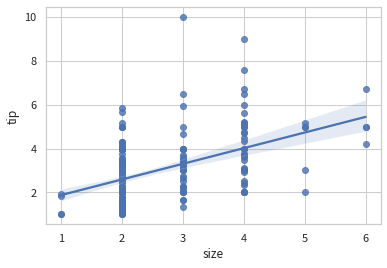

In [10]:
sns.regplot(x="size", y="tip", data=tips)
plt.show()

total_bill과 size 두 가지 값을 모두 입력값으로 하여 tip을 예측하는 방정식을 찾으면 다음과 같다. 

In [11]:
result2 = sm.OLS.from_formula("tip ~ total_bill + size", tips).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Sun, 24 Jul 2022   Prob (F-statistic):           9.67e-34
Time:                        15:46:37   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6689      0.194      3.455      0.001       0.288       1.050
total_bill     0.0927      0.009     10.172      0.000       0.075       0.111
size           0.1926      0.085      2.258      0.025       0.025       0.361
==============================================================================
Omnibus:                       24.753   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.169
Skew:                           0.545   Prob(JB):                     9.43e-11
Kurtosis:                       4.831   Cond. No.                         67.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

위 코드에 대해서도 다음 절에서 설명한다. 일단은 위 결과로부터 우리가 원하는 방정식은 다음과 같다는 것을 알 수 있다.

$$
\;\;\;\text{tip} = 0.0927 \cdot \text{total_bill} + 0.1926 \cdot \text{size} + 0.6689\;\;\;
$$

이 식에서 total_bill에 대한 가중치는 0.0927, size에 대한 가중치는 0.1926, 상수항은 0.6689라는 것을 알 수 있다. 

이 함수를 파이썬 함수로 정의하면 다음과 같다.

In [12]:
def reg2(total_bill, size):
    return 0.0927 * total_bill + 0.1926 * size + 0.6689

이 함수를 이용하여 total_bill=30, size=4 인 경우 즉, 4인 고객이 30달러를 지불하는 경우의 팁을 계산하면 4.22달러다.

In [13]:
reg2(30, 4)

4.2203

실제로 해당 경우의 데이터를 구하면 다음과 같다. 

In [14]:
idx = (tips.total_bill >= 29) & (tips.total_bill <= 31) & (tips["size"] == 4)
tip_totalbill30size4 = tips[idx].tip
tip_totalbill30size4

44     5.60
116    5.07
219    3.09
Name: tip, dtype: float64

평균값은 4.59달러로 우리가 계산한 4.22달러와 비슷하다.

In [15]:
tip_totalbill30size4.mean()

4.586666666666667

이와 같이 복수의 데이터 값으로부터 다른 수치형 데이터의 값을 구하는 것을 <b>다변수 회귀분석(multivariate regression analysis)</b>이라고 한다. 

## 독립변수와 종속변수

회귀분석을 하려면 우선 우리가 값을 구하려는 수치형 데이터와 그 데이터를 계산하기 위해 사용하는 데이터들이 무엇인지를 결정해야 한다. 회귀분석에서 분석의 대상이 되는 수치형 변수를 <b>종속변수(independent variable)</b>라 하고 그 종속변수에 영향을 주는 다른 변수들을 <b>독립변수(dependent variable)</b>라 한다. 수식으로 표현할 때 종속변수는 $y$ 기호로 나타내고 독립변수는 $x$ 기호로 나타낸다. 독립변수가 여러개 있을 때는 $x_1, x_2, \ldots, x_K$ 등으로 아랫첨자를 이용하여 표시한다.

위에서 보인 첫번째 회귀분석 예에서는 독립변수와 종속변수가 다음과 같았다.

* 독립변수 
  * $x_1$ : total_bill
* 종속변수
  * $y$ : tip
  
두번째 회귀분석 예의 독립변수와 종속변수는 다음과 같았다.

* 독립변수 
  * $x_1$ : total_bill
  * $x_2$ : size
* 종속변수
  * $y$ : tip
 

## 회귀분석

수학적으로 회귀분석을 정의할 수 있는 방법도 여러가지가 있다. 가장 간단한 정의는 $N$개의 데이터 $\{x_i, y_i\} (i=1,2,\ldots,N)$가 있을 때 이 데이터와 가장 비슷한 함수 

$$ y = f(x) $$

를 찾아내는 것이다. 가장 비슷하다는 것은 다음과 같이 정의한다.

실제 데이터 $x_i (i=1,2,\ldots,N)$를 이 함수에 넣으면 함수의 결과 즉, 회귀분석 예측값 $\hat{y}_i (i=1,2,\ldots,N)$이 나온다.

$$ \hat{y}_i = f(x_i) $$

이 예측값 $\hat{y}_i$은 $x_i$에 대응하는 원 데이터 $y_i$값과 차이가 있을 수 있다. 이 차이를 <b>잔차(residual)</b>라고 한다.

$$ e_i = y_i - \hat{y}_i $$

$N$개의 모든 데이터에 대해 $N$개의 잔차값이 나온다. 이 모든 잔차를 제곱하여 더한 것을 <b>잔차제곱합(RSS: Residual Sum of Squares)</b>이라고 한다.

$$ \text{RSS} = \sum_{i=1}^N e_i^2 $$

잔차제곱합 RSS가 작을수록 회귀분석으로 구한 예측값 $\hat{y}_i$값이 원래 데이터 $y_i$값이 비슷하다는 뜻이므로 좋은 함수가 된다. 회귀분석은 미리 정해놓은 여러가지 함수들 중에서 가장 잔차제곱합이 작은 함수를 찾는 과정이다. 미리 정해놓은 함수들의 집합을 <b>회귀분석모형(regression model)</b>이라고 한다.

위에서 보인 첫번째 회귀분석 예에서 잔차제곱합을 구해보자. 우선 회귀분석 함수에서 $\hat{y}$를 구하면 다음과 같다.

In [16]:
y_hat = reg1(tips.total_bill)
y_hat

0      2.70425
1      2.00600
2      3.12635
3      3.40670
4      3.50225
        ...   
239    3.96845
240    3.77420
241    3.30065
242    2.79140
243    2.89220
Name: total_bill, Length: 244, dtype: float64

원래의 tip 값에서 이 값을 빼면 잔차 $e$를 구할 수 있다. 

In [17]:
e = tips.tip - y_hat
e

0     -1.69425
1     -0.34600
2      0.37365
3     -0.09670
4      0.10775
        ...   
239    1.95155
240   -1.77420
241   -1.30065
242   -1.04140
243    0.10780
Length: 244, dtype: float64

이 잔차들을 제곱하여 합한 잔차제곱합 RSS를 구하면 약 252.7888이다.

In [18]:
(e ** 2).sum()

252.78880587749998

## 선형회귀분석

이제 회귀분석 중에서 가장 널리 사용되는 <b>선형회귀분석(linear regression analysis)</b>에 대해 설명한다.

### 선형회귀분석의 가정

선형회귀분석에서는 현실세계의 데이터가 다음과 같은 자연법칙을 따른다고 가정한다.

$$ 
y = 
\underbrace{w_0 + w_1 \cdot x_1  + w_2 \cdot x_2 + \cdots + w_K \cdot x_K}_{\text{독립변수의 선형조합}} 
+ \underbrace{\varepsilon}_{\text{교란항}}
$$ 

이 자연법칙 식에서 $x_1, x_2, \ldots, x_K$는 $K$개의 독립변수의 값이고 $w_0, w_1, \ldots, w_K$는 상수항을 포함한 가중치다. 독립변수의 값은 데이터 표본마다 바뀔 수 있지만 가중치는 항상 변하지 않는 고정된 값이다. 가중치와 독립변수로 이루어진 다음 

$$ w_0 + w_1 \cdot x_1  + w_2 \cdot x_2 + \cdots + w_K \cdot x_K $$

부분을 독립변수의 <b>선형조합(linear combination)</b>이라고 한다. 위 식에서 이 선형조합 부분은 독립변수의 값과 가중치만 알면 정확하게 계산할 수 있다.

위 자연법칙 식에서 가장 끝에 있는 $\varepsilon$은 <b>교란항(disturbance)</b>이라고 하며 값을 예측할 수 없는 확률변수이다. 따라서 위 자연법칙을 해석하면 다음과 같은 의미가 된다.

> 종속변수 $y$의 값은 독립변수 $x_1, x_2, \ldots, x_K$ 값의 선형조합으로 어느 정도 결정되지만 이것만으로 예측할 수 없는 부분이 존재한다.  

이를 그림으로 표현하면 다음과 같다.

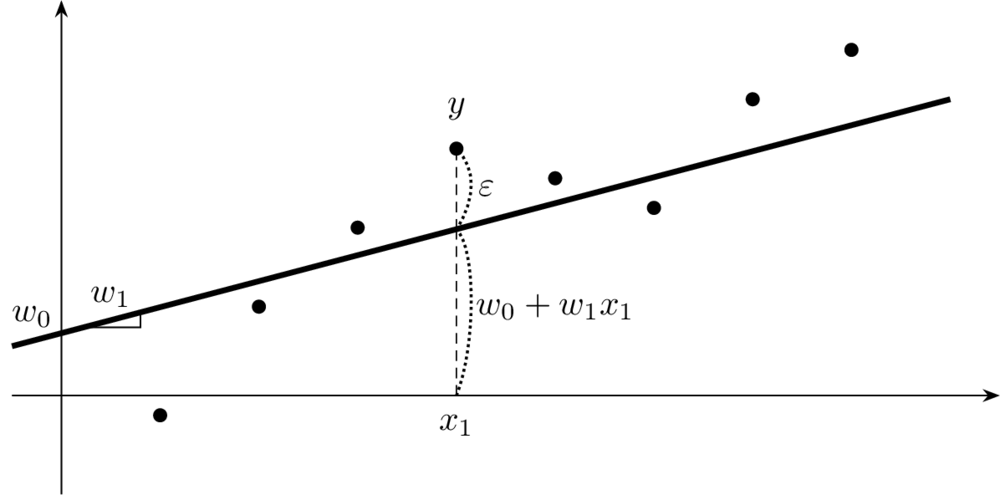

In [19]:
%%tikz -s 1000,500 -l arrows.meta

\draw[->, >=Stealth] (-0.5,0) -- (9.5,0);
\draw[->, >=Stealth] (0,-1) -- (0,4);
\draw[ultra thick] (-0.5,0.5) -- (9,3);
\node at (-0.3,0.8) {$w_0$};
\draw (0.2,0.69) -- (0.8,0.69) -- (0.8,0.83);
\node at (0.5,1) {$w_1$};

\fill[radius=2pt] (1,-0.2) circle;
\fill[radius=2pt] (2,0.9) circle;
\fill[radius=2pt] (3,1.7) circle;
\fill[radius=2pt] (4,2.5) circle;
\fill[radius=2pt] (5,2.2) circle;
\fill[radius=2pt] (6,1.9) circle;
\fill[radius=2pt] (7,3) circle;
\fill[radius=2pt] (8,3.5) circle;

\node at (4,-0.3) {$x_1$};
\draw[densely dashed] (4,0) -- (4,1.68);
\draw[thick, densely dotted] (4,0) .. controls (4.2,0.5) and (4.2,1.5) .. (4,1.68);
\node at (5,0.9) {$w_0+w_1x_1$};
\draw[densely dashed] (4,1.68) -- (4,2.5);
\draw[thick, densely dotted] (4,1.68) .. controls (4.2,2) and (4.2,2.3) .. (4,2.5);
\node at (4.3,2.1) {$\varepsilon$};
\node at (4,2.9) {$y$};

### 선형회귀분석의 1차적 목적

선형회귀분석의 1차적인 목적은 바로 이 가중치 $w_0, w_1, \ldots, w_K$을 알아내는 것이다. 하지만 우리는 어떠한 선형회귀분석 방법으로 이 값을 100% 정확하게는 알아낼 수 없다. 우리가 선형회귀분석으로 알아낸 값은 가중치 $w_0, w_1, \ldots, w_K$에 대한 추정치 $\hat{w}_0, \hat{w}_1, \ldots, \hat{w}_K$일 뿐이다. 이 가중치의 추정치 $\hat{w}_j$는 원래 가중치 $w_j$와 같은 값이라는 보장이 없다.

$$ \hat{w}_j \neq w_j \;\;\;\; (j=0,1,\ldots,K) $$

이를 그림으로 표현하면 다음과 같다.

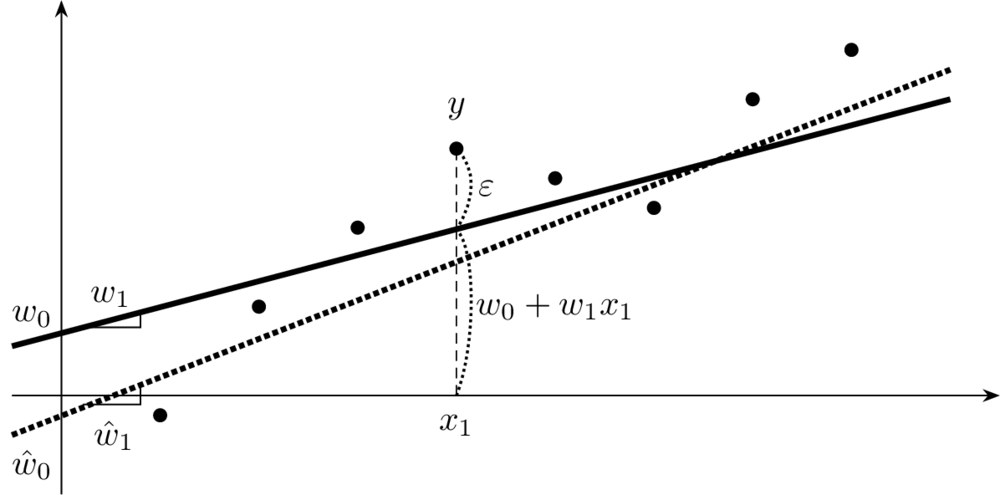

In [20]:
%%tikz -s 1000,500 -l arrows.meta

\draw[->, >=Stealth] (-0.5,0) -- (9.5,0);
\draw[->, >=Stealth] (0,-1) -- (0,4);
\draw[ultra thick] (-0.5,0.5) -- (9,3);
\node at (-0.3,0.8) {$w_0$};
\draw (0.2,0.69) -- (0.8,0.69) -- (0.8,0.83);
\node at (0.5,1) {$w_1$};

\fill[radius=2pt] (1,-0.2) circle;
\fill[radius=2pt] (2,0.9) circle;
\fill[radius=2pt] (3,1.7) circle;
\fill[radius=2pt] (4,2.5) circle;
\fill[radius=2pt] (5,2.2) circle;
\fill[radius=2pt] (6,1.9) circle;
\fill[radius=2pt] (7,3) circle;
\fill[radius=2pt] (8,3.5) circle;

\node at (4,-0.3) {$x_1$};
\draw[densely dashed] (4,0) -- (4,1.68);
\draw[thick, densely dotted] (4,0) .. controls (4.2,0.5) and (4.2,1.5) .. (4,1.68);
\node at (5,0.9) {$w_0+w_1x_1$};
\draw[densely dashed] (4,1.68) -- (4,2.5);
\draw[thick, densely dotted] (4,1.68) .. controls (4.2,2) and (4.2,2.3) .. (4,2.5);
\node at (4.3,2.1) {$\varepsilon$};
\node at (4,2.9) {$y$};

\draw[ultra thick, densely dotted] (-0.5,-0.4) -- (9,3.3);
\node at (-0.3,-0.7) {$\hat{w}_0$};
\draw (0.22,-0.09) -- (0.8,-0.09) -- (0.8,0.13);
\node at (0.53,-0.4) {$\hat{w}_1$};

### 선형회귀분석을 사용한 종속변수 예측

선형회귀분석의 최종 목적은 독립변수의 값이 주어졌을 때 종속변수의 값을 예측하는 것이다. 이 때는 다음 수식을 사용하게 된다.

$$ 
\hat{y} = 
\hat{w}_0 + \hat{w}_1 \cdot x_1  + \hat{w}_2 \cdot x_2 + \cdots + \hat{w}_K \cdot x_K
$$ 

이 예측치 $\hat{y}$값은 두가지 측면에서 원래의 $y$값과 달라진다. 

1. 가중치 $w$를 정확하게 예측하더라도 교란항(disturbance) $\varepsilon$만큼 차이가 있다.
2. 그런데 가중치 $w$ 자체도 정확하게 예측하지 못하고 이에 대한 추정치 $\hat{w}$을 사용하므로 선형조합 부분도 원래의 선형조합 부분과 차이가 있다. 

이렇게 발생하는 원래의 $y$값과 예측치 $\hat{y}$의 차이를 잔차(residual) $e$라고 한다. 

이를 그림으로 표현하면 다음과 같다. 그림에서 교란항과 잔차가 다르다는 점에 유의하라.

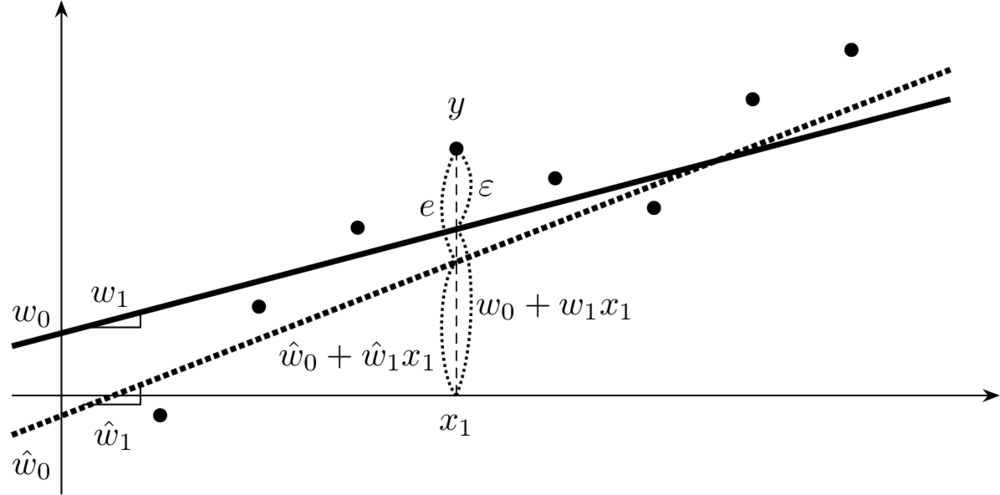

In [21]:
%%tikz -s 1000,500 -l arrows.meta

\draw[->, >=Stealth] (-0.5,0) -- (9.5,0);
\draw[->, >=Stealth] (0,-1) -- (0,4);
\draw[ultra thick] (-0.5,0.5) -- (9,3);
\node at (-0.3,0.8) {$w_0$};
\draw (0.2,0.69) -- (0.8,0.69) -- (0.8,0.83);
\node at (0.5,1) {$w_1$};

\fill[radius=2pt] (1,-0.2) circle;
\fill[radius=2pt] (2,0.9) circle;
\fill[radius=2pt] (3,1.7) circle;
\fill[radius=2pt] (4,2.5) circle;
\fill[radius=2pt] (5,2.2) circle;
\fill[radius=2pt] (6,1.9) circle;
\fill[radius=2pt] (7,3) circle;
\fill[radius=2pt] (8,3.5) circle;

\node at (4,-0.3) {$x_1$};
\draw[densely dashed] (4,0) -- (4,1.68);
\draw[thick, densely dotted] (4,0) .. controls (4.2,0.5) and (4.2,1.5) .. (4,1.68);
\node at (5,0.9) {$w_0+w_1x_1$};
\draw[densely dashed] (4,1.68) -- (4,2.5);
\draw[thick, densely dotted] (4,1.68) .. controls (4.2,2) and (4.2,2.3) .. (4,2.5);
\node at (4.3,2.1) {$\varepsilon$};
\node at (4,2.9) {$y$};

\draw[ultra thick, densely dotted] (-0.5,-0.4) -- (9,3.3);
\node at (-0.3,-0.7) {$\hat{w}_0$};
\draw (0.22,-0.09) -- (0.8,-0.09) -- (0.8,0.13);
\node at (0.53,-0.4) {$\hat{w}_1$};

\draw[thick, densely dotted] (4,0) .. controls (3.8,0.2) and (3.8,1.2) .. (4,1.34);
\node at (3,0.4) {$\hat{w}_0+\hat{w}_1x_1$};
\draw[thick, densely dotted] (4,1.34) .. controls (3.8,1.7) and (3.8,2.1) .. (4,2.5);
\node at (3.7,1.9) {$e$};